## Practice Questions

This notebook contains practise questions for the assess coursework on the 19th of March. I will upload some model answers in a later lecture. If you can answer all of these questions, then you shouldn't have too much trouble in the coursework.

Please use the ‘litho_log’ data available in the data folder of this repository to complete these exercises.

### Exercise 1 (Approx. 15 mins)

You have been given some data that contains a large number of observations of downhole logs and the name of the lithologies associated with the log response.
 - 'DEPTH_WMSF': the depth of the measurement below seafloor 
 - 'HCGR': Total gamma ray counts 
 - 'HFK': Potassium counts 
 - 'HTHO': Thorium counts 
 - 'HURA': Uranium counts 
 - 'IDPH': Deep Phasor Dual Induction–Spherically Focused Resistivity 
 - 'IMPH': Medium Phasor Dual Induction–Spherically Focused Resistivity 
 - 'SFLU': Shallow Phasor Dual Induction–Spherically Focused Resistivity 
 - 'lithology': our target value, a string representing the name of the lithology
 
Using a Markdown cell, describe the steps that you would take to clean this data and prepare it for machine learning analysis.

### Answer
1. Open/read the dataset using pd.read_csv()
2. Drop duplicates
3. Split data into features and target variables
-       X contains the features, y contains the target variables
-       Because our target variable uses strings, it should be encoded into numbers after splitting.)
4. Split dataset into train set 70% and test set 30% (or other reasonable set sizes) using train_test_split()
5. Search for outliers and deal with them according to domain knowledge (replace unusual values with np.nan)
        - Make changes to both X train and X test
6. Impute missing values and scale your data
        - Put in a pipeline

## Answer:
1. Open/read the dataset using pd.read_csv() pandas function
2. Drop the duplicates
3. Split data into features and target variables
-   X contains features, y is the target
-   if target is string -> encode it to numbers
4. Split dataset into train set (70% of data) and test set (30% of data) using train_test_split()
5. Search for outliers, deal with them according to domain knowledge. Replace unusual values with np.nan. Change on both X train and X test
6. Create a pipeline to impute missing values and scale your data.

### Exercise 2 (25 minutes)

Load the data set and drop any duplicates you find.

Then answer the following questions:

 - What is the distribution of the lithologies in this dataset?
 - What is the average depth of the interbedded clay and mud?
 - Among the samples found at or below 400m (below seafloor), what are the characteristics of the samples with the five highest Uranium counts?

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Data/litho_log_data.csv')
data.drop_duplicates(inplace = True)
data['lithology'].unique()
display(data['lithology'].value_counts())

#plt.xticks(rotation=90)
#plt.xlabel('Lithology')
#plt.ylabel('Frequency of Occurance')
#plt.hist(data['lithology']);

display(data[data['lithology']=='Interbedded clay and mud']['DEPTH_WMSF'].mean())

data[data['DEPTH_WMSF'] >= 400].sort_values(by='HURA', ascending = False).head()

lithology
Mud                          5406
Marl                         2619
Interbedded clay and mud     1863
Sandy Mud                    1812
Interbedded sand and mud      979
Name: count, dtype: int64

57.58818615136875

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,lithology
2656,432.9040,36.3385,1.1301,5.0357,5.3518,1.2467,1.1140,0.6402,Marl
2657,433.0564,40.7457,1.2416,5.7963,5.1878,1.2465,1.1150,0.6592,Marl
2659,433.3612,41.2251,1.2359,5.9830,5.0735,1.2500,1.1159,0.6541,Marl
2655,432.7516,34.8786,1.0104,5.2683,4.9194,1.2480,1.1136,0.6050,Marl
3821,783.8812,42.5650,1.0508,7.4969,4.9164,1.6550,1.4932,0.9354,Sandy Mud


In [1]:
import pandas as pd
data = pd.read_csv('Data/litho_log_data.csv')
data.drop_duplicates(inplace = True)

print(data['lithology'].value_counts())

display(data[data['lithology'] == 'Interbedded clay and mud']['DEPTH_WMSF'].mean())

data[data['DEPTH_WMSF'] >= 400].sort_values(by = 'HURA', ascending = False).head(5)

lithology
Mud                          5406
Marl                         2619
Interbedded clay and mud     1863
Sandy Mud                    1812
Interbedded sand and mud      979
Name: count, dtype: int64


C:\Users\nikol\AppData\Local\Temp\ipykernel_42412\3725236001.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


57.58818615136875

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,lithology
2656,432.9040,36.3385,1.1301,5.0357,5.3518,1.2467,1.1140,0.6402,Marl
2657,433.0564,40.7457,1.2416,5.7963,5.1878,1.2465,1.1150,0.6592,Marl
2659,433.3612,41.2251,1.2359,5.9830,5.0735,1.2500,1.1159,0.6541,Marl
2655,432.7516,34.8786,1.0104,5.2683,4.9194,1.2480,1.1136,0.6050,Marl
3821,783.8812,42.5650,1.0508,7.4969,4.9164,1.6550,1.4932,0.9354,Sandy Mud


### Exercise 3.1 (10 minutes)

Using the steps you outlined in Exercise 1, split this dataset into a training set and a testing set (with reasonable names). 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data.drop_duplicates(inplace=True)
X = data.drop(columns = 'lithology')
y = data['lithology']

encoder = LabelEncoder()

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate the data into features (X) and the target variable (y)
X = data.drop(columns = 'lithology')
y = data['lithology']

# Use as label encoder to convert the strings in the Lithology column to integers. Label Encoder is similar to scalar/imputer. Fit encoder to target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

#display(X_train, y_train)

y_train #lithology names are now numbers, not string

#to convert numbers back into strings: encoder.transform inverse


array([0, 2, 3, ..., 3, 3, 0])

### Exercise 3.2 (20 minutes)

Examine the training set. Are there any missing or unusual values in any of the columns? What are these values and in which columns can they be found? Use a Markdown cell to describe your findings.

,IDPH,IMPH,SFLU
count,8874.000000,8867.000000,8872.000000
mean,290.929236,326.102782,494.945245
std,689.628415,705.134634,2132.868259
min,0.339900,0.285100,0.091500
25%,1.198325,1.102400,0.633700
50%,1.335250,1.244200,0.752850
75%,1.966925,1.959550,1.069550
max,1950.000000,1950.000000,9700.000000


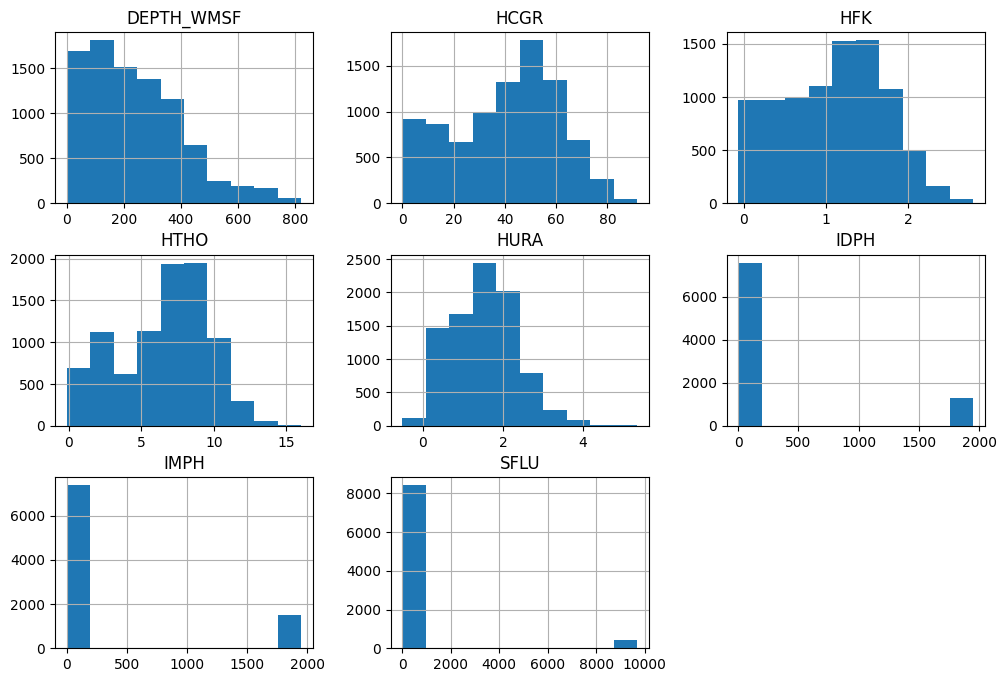

In [26]:
X_train.isna().sum()
# every column apart from depth has missing values. HTHO, IMPH, HCGR have the most missing values

X_train.describe()
# hard to visualise but still useful statistics. HFK, HTHO and HURA have negative min values

X_train.hist(figsize = (12,8));
#IDPH, IMPH, SFLU have outliers

X_train[['IDPH', 'IMPH', 'SFLU']].describe()
# Values in these columns are likely to be referring to either missing data or invalid measurements. 75% <2 for all, max value is > 1000 => werid data.

# Data null values which need to be removed before continuing with analysis. 
# These are continuous variables => a good strategy would be to impute the mean value of each column in place of the null values.

,IDPH,IMPH,SFLU
count,8874.000000,8867.000000,8872.000000
mean,290.929236,326.102782,494.945245
std,689.628415,705.134634,2132.868259
min,0.339900,0.285100,0.091500
25%,1.198325,1.102400,0.633700
50%,1.335250,1.244200,0.752850
75%,1.966925,1.959550,1.069550
max,1950.000000,1950.000000,9700.000000


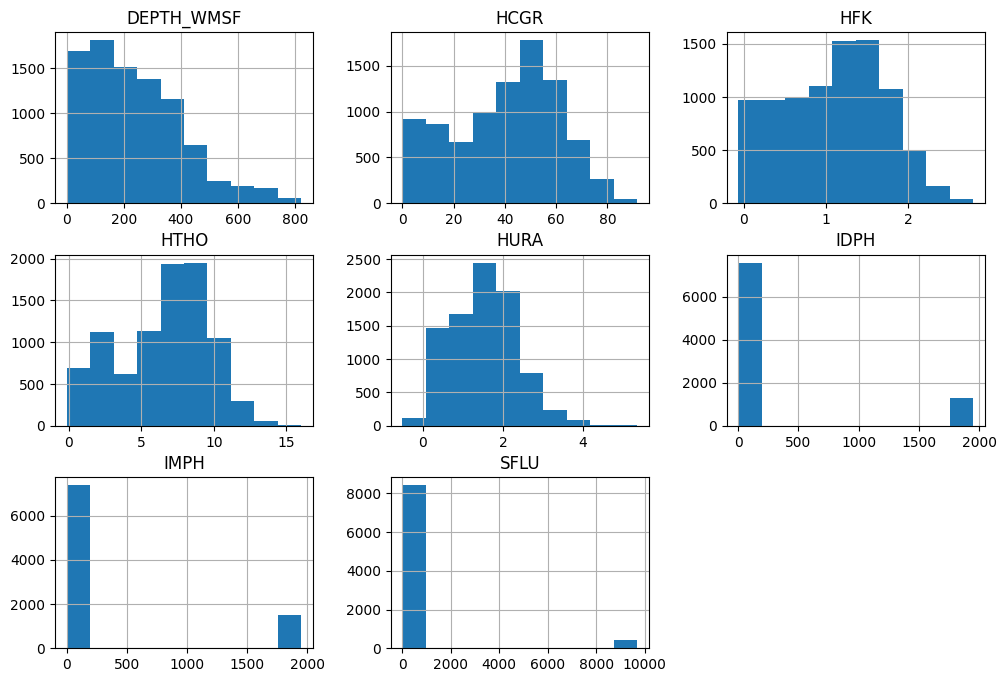

In [25]:
#X_train.describe() not intuitive, hard to see unusual values

X_train.isna().sum()

# Create barcharts to explore the data - there's clearly something unusual about IDPH, IMPH, and SFLU
X_train.hist(figsize = (12,8));
# 3 outliers in IDPH, IMPH, SFLU

X_train[['IDPH', 'IMPH', 'SFLU']].describe()

# not every outlier is a missing value, use domain knowledge to see if its missing value/error in measurement or real piece of data

<Axes: >

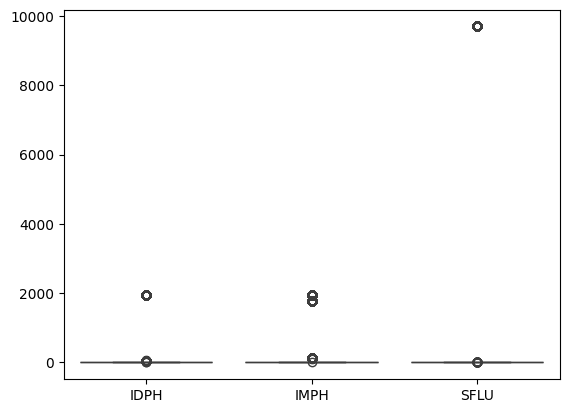

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(X_train[['IDPH', 'IMPH', 'SFLU']])
#plt.ylim(0, 5)

## Exercise 3.3 (10 minutes)

Replace any unusual values with `np.nan`. 

In [32]:
import numpy as np
# replace offending values with lambda functions
X_train[['IDPH', 'IMPH']] = X_train[['IDPH', 'IMPH']].apply(lambda x: np.where(x == 1950, np.nan, x))
X_train[['SFLU']] = X_train[['SFLU']].apply(lambda x: np.where(x == 9700, np.nan, x))

# data already split => don't use data, use X_train

# do that for X_test dataset too
X_test[['IDPH', 'IMPH']] = X_test[['IDPH', 'IMPH']].apply(lambda x: np.where(x == 1950, np.nan, x))
X_test[['SFLU']] = X_test[['SFLU']].apply(lambda x: np.where(x == 9700, np.nan, x))


## Exercise 4 (30 mins)

Create a pipeline with an `Imputer`, a `Scaler`, and a `DecisionTreeClassifier`. Set the `random_state` of the `DecisionTreeClassifier` to 42.

Create and run a RandomizedSearchCV on three hyperparameters of your choice using `accuracy` as the metric of choice (use `n_iter = 20`). Explain what varying each of your selected hyperparameters will do to your model.

Print out the accuracy and parameters of your best model.

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

dt_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler()),
    ('model', DecisionTreeClassifier(random_state=42))
])

param_distr = {
    'model__max_depth': randint(low = 1, high = 40),
    'model__max_features': randint(low = 1, high = 40),
    'model__min_samples_split': randint(low = 1, high = 40)
}

searcher = RandomizedSearchCV(dt_pipe, param_distributions=param_distr, cv=5, n_iter=20, scoring = 'accuracy', random_state=42)
searcher.fit(X_train, y_train)

print('Best model',searcher.best_estimator_)
print('Best model score:', searcher.best_score_)
pd.set_option('max_colwidth', 100)
pd.DataFrame(searcher.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

Best model Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=19, max_features=23,
                                        min_samples_split=11,
                                        random_state=42))])
Best model score: 0.8975774647887323


,params,mean_test_score,rank_test_score
2,"{'model__max_depth': 19, 'model__max_features': 23, 'model__min_samples_split': 11}",0.897577,1
14,"{'model__max_depth': 20, 'model__max_features': 28, 'model__min_samples_split': 7}",0.896451,2
0,"{'model__max_depth': 39, 'model__max_features': 29, 'model__min_samples_split': 15}",0.895437,3
16,"{'model__max_depth': 17, 'model__max_features': 36, 'model__min_samples_split': 4}",0.895099,4
7,"{'model__max_depth': 33, 'model__max_features': 12, 'model__min_samples_split': 22}",0.893859,5
9,"{'model__max_depth': 16, 'model__max_features': 15, 'model__min_samples_split': 3}",0.893746,6
18,"{'model__max_depth': 29, 'model__max_features': 18, 'model__min_samples_split': 26}",0.892958,7
8,"{'model__max_depth': 25, 'model__max_features': 27, 'model__min_samples_split': 28}",0.890366,8
10,"{'model__max_depth': 37, 'model__max_features': 7, 'model__min_samples_split': 21}",0.888563,9
13,"{'model__max_depth': 9, 'model__max_features': 26, 'model__min_samples_split': 2}",0.888451,10


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

dt_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('dt_model', DecisionTreeClassifier(random_state=42))
])

#hyperparameters I want to test
#one way:
#param_grid = {
#    'dt_model__max_features': [i for i in range(2,9)],
#    'dt_model__max_depth': [i for i in range(4,11)],
#    'dt_model__min_samples_split': [i for i in range(1, 21)]
#}

#second way: use randint
param_grid = {
    'dt_model__max_features': randint(4,40),
    'dt_model__max_depth': randint(4,40),
    'dt_model__min_samples_split': randint(4,40)
}

#n_iter = 20: train 20 models
rnd_search = RandomizedSearchCV(dt_pipe, param_distributions = param_grid,
                                n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

rnd_search.fit(X_train, y_train)

print(rnd_search.best_score_)
print(rnd_search.best_estimator_)

pd.DataFrame(rnd_search.cv_results_)

0.8972394366197184
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('dt_model',
                 DecisionTreeClassifier(max_depth=32, max_features=18,
                                        min_samples_split=11,
                                        random_state=42))])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt_model__max_depth,param_dt_model__max_features,param_dt_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.314402,0.008746,0.006845,0.003775,32,18,11,"{'dt_model__max_depth': 32, 'dt_model__max_fea...",0.905352,0.890141,0.892958,0.895775,0.901972,0.897239,0.005641,1
1,0.298207,0.014666,0.005006,0.004548,24,22,26,"{'dt_model__max_depth': 24, 'dt_model__max_fea...",0.897465,0.890704,0.886197,0.890141,0.899718,0.892845,0.004993,8
2,0.302181,0.017398,0.005037,0.005025,14,14,27,"{'dt_model__max_depth': 14, 'dt_model__max_fea...",0.897465,0.892958,0.888451,0.892394,0.896901,0.893634,0.003293,7
3,0.331199,0.019555,0.006953,0.004051,39,27,6,"{'dt_model__max_depth': 39, 'dt_model__max_fea...",0.900282,0.891831,0.889577,0.891831,0.896338,0.893972,0.003844,6
4,0.212153,0.014214,0.008463,0.002748,25,5,27,"{'dt_model__max_depth': 25, 'dt_model__max_fea...",0.883380,0.868169,0.875493,0.876620,0.883380,0.877408,0.005674,17
5,0.205105,0.014036,0.011158,0.001377,33,5,24,"{'dt_model__max_depth': 33, 'dt_model__max_fea...",0.896338,0.877183,0.874930,0.871549,0.883380,0.880676,0.008731,16
6,0.285441,0.035128,0.005722,0.005576,36,15,25,"{'dt_model__max_depth': 36, 'dt_model__max_fea...",0.900282,0.889577,0.885070,0.890141,0.898592,0.892732,0.005774,9
7,0.320529,0.028025,0.008854,0.003488,28,30,31,"{'dt_model__max_depth': 28, 'dt_model__max_fea...",0.901408,0.891831,0.879437,0.895211,0.882254,0.890028,0.008152,11
8,0.337455,0.022043,0.006413,0.003733,19,18,6,"{'dt_model__max_depth': 19, 'dt_model__max_fea...",0.900282,0.898592,0.889577,0.891831,0.895211,0.895099,0.004006,3
9,0.247697,0.015000,0.008572,0.005143,10,24,12,"{'dt_model__max_depth': 10, 'dt_model__max_fea...",0.905352,0.894648,0.889014,0.892394,0.898592,0.896000,0.005618,2


## Exercise 5 (10 mins)

Explain why accuracy may not be the best metric for assessing the performance of a classifier model.

Describe three other classification metrics and the scenarios in which they would be useful.

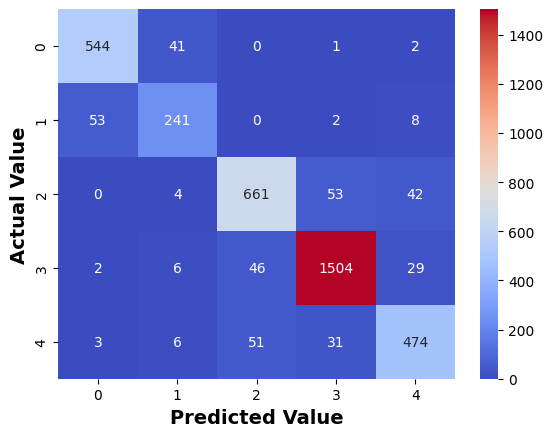

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = searcher.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = 'g')

plt.xlabel('Predicted Value', fontsize = 14, weight = 'bold')
plt.ylabel('Actual Value', fontsize = 14, weight = 'bold');

Accuracy may not be an ideal measure when the dataset is imbalanced, as it tends to significantly overestimate the performance of a model. 


If you have a binary target variable that is either "Yes" or "No" and your dataset had 99 "Yes" values and 1 "No" value. If you created a "model" that simply predicted "Yes" for each sample, regardless of the values in the features, your "model" would have an accuracy of 99% - but this would be a terrible model.
